3) Um estudo de condicionamento físico foi feito com 31 pessoas.
A ideia era entender quais fatores poderiam influenciar o tempo que elas demoravam para correr 6 km.

Os dados estão na planilha **Green_Belt_FM2S_Lista_Exercícios_03_e_04**, na aba **03.Condicionamento**.

| **Coluna do worksheet** | **Descrição** |
|--------------------------|---------------|
| **OBS**        | Número da pessoa. |
| **IDADE**      | Idade da pessoa sendo avaliada. |
| **Peso**       | Peso da pessoa sendo avaliada. |
| **Tempo**      | Tempo que a pessoa demorou para correr 3 km. |
| **Batcar_d**   | Batimento cardíaco em repouso. |
| **Batcar_c**   | Batimento cardíaco correndo. |
| **Batcar_m**   | Batimento máximo. |
| **C_oxig**     | Consumo de oxigênio. |
| **Grupo**      | Agrupamento segundo histórico de vida (levando em conta fatores de risco como hábito de fumar, alimentação, etc.) |

---

**Responda:**

**a)** Construa um modelo de Regressão Linear Múltipla para o tempo.

**b)** Quais fatores influenciam e quais fatores não influenciam?

**c)** Quanto da variação do tempo pode ser explicado pelo modelo proposto?

**d)** Qual é a equação da reta?

**e)** Qual é a melhor configuração se eu quiser minimizar o tempo gasto?

In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np

In [3]:
url = '/content/[FM2S] Lista_Exercícios_ 3 e 4.xlsx'
pd.ExcelFile(url).sheet_names

['1.Teste_Medicamento', '2.Construtora', '3.Condicionamento_Físico']

In [8]:
df = pd.read_excel(url, sheet_name=2) # df = pd.read_excel(url, sheet_name='3.Condicionamento_Físico')

In [7]:
print(df.head())
print(df.describe())
print(df.info())

   OBS  IDADE   PESO  TEMPO  BATCAR_D  BATCAR_C  BATCAR_M  C_OXIG  GRUPO
0    1     57  73.37  12.63        58       174       176   39.41      2
1    2     54  79.38  11.17        62       156       165   46.08      2
2    3     52  76.32   9.63        48       164       166   45.44      2
3    4     50  70.87   8.92        48       146       155   54.63      2
4    5     51  67.25  11.08        48       172       172   45.12      2
             OBS      IDADE       PESO      TEMPO   BATCAR_D    BATCAR_C  \
count  31.000000  31.000000  31.000000  31.000000  31.000000   31.000000   
mean   16.000000  47.677419  77.444516  10.586129  53.741935  169.645161   
std     9.092121   5.211443   8.328568   1.387414   8.294447   10.251986   
min     1.000000  38.000000  59.080000   8.170000  40.000000  146.000000   
25%     8.500000  44.000000  73.200000   9.780000  48.000000  163.000000   
50%    16.000000  48.000000  77.450000  10.470000  52.000000  170.000000   
75%    23.500000  51.000000  8

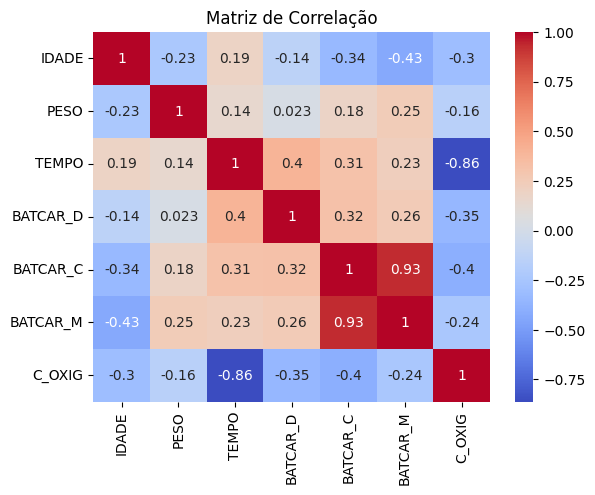

In [9]:
import seaborn as sns

# Matriz de correlação
corr = df.drop(columns=['OBS', 'GRUPO']).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

In [10]:
import statsmodels.api as sm

X = df[['TEMPO', 'BATCAR_M']]  # Variáveis independentes
y = df['C_OXIG']               # Variável dependente

# Adiciona intercepto e ajusta modelo
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                 C_OXIG   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.727
Method:                 Least Squares   F-statistic:                     40.93
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           4.87e-09
Time:                        18:05:49   Log-Likelihood:                -74.152
No. Observations:                  31   AIC:                             154.3
Df Residuals:                      28   BIC:                             158.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.4759      9.808      8.817      0.0

In [11]:
from scipy.stats import f_oneway

# Compara C_OXIG entre grupos
grupo0 = df[df['GRUPO'] == 0]['C_OXIG']
grupo1 = df[df['GRUPO'] == 1]['C_OXIG']
grupo2 = df[df['GRUPO'] == 2]['C_OXIG']

f_stat, p_valor = f_oneway(grupo0, grupo1, grupo2)
print(f"p-valor ANOVA: {p_valor:.4f}")

p-valor ANOVA: 0.4044


In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Prepara dados
X = df.drop(columns=['OBS', 'GRUPO'])
y = df['GRUPO']

# Treina modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
modelo = RandomForestClassifier()
modelo.fit(X_train, y_train)

# Acurácia
print(f"Acurácia: {modelo.score(X_test, y_test):.2f}")

Acurácia: 0.43


**a)** Construa um modelo de Regressão Linear Múltipla para o tempo.

In [14]:
# Preparando os dados
X = df[['IDADE', 'PESO', 'BATCAR_D', 'BATCAR_C', 'BATCAR_M', 'C_OXIG']]  # Variáveis independentes
y = df['TEMPO']  # Variável dependente

# Adicionando intercepto e ajustando o modelo
X = sm.add_constant(X)
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                  TEMPO   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     14.84
Date:                Thu, 10 Jul 2025   Prob (F-statistic):           4.93e-07
Time:                        18:25:09   Log-Likelihood:                -29.607
No. Observations:                  31   AIC:                             73.21
Df Residuals:                      24   BIC:                             83.25
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.2882      5.597      4.339      0.0

**b)** Quais fatores influenciam e quais fatores não influenciam?

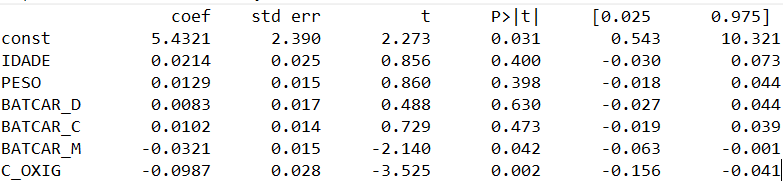

Interpretação:

Fatores significativos (p-valor < 0.05):

BATCAR_M (batimento cardíaco máximo): Reduz o tempo (-0.0321 por unidade).

C_OXIG (consumo de oxigênio): Reduz o tempo (-0.0987 por unidade).

Fatores não significativos (p-valor > 0.05):

Idade, peso, batimentos em repouso (BATCAR_D) e durante corrida (BATCAR_C).

**c)** Quanto da variação do tempo pode ser explicado pelo modelo proposto?

R-squared: 0.752
→ 75.2% da variação no tempo é explicada pelo modelo.

**d)** Qual é a equação da reta?

TEMPO=5.4321+0.0214×IDADE+0.0129×PESO+0.0083×BATCAR_D+0.0102×BATCAR_C−0.0321×BATCAR_M−0.0987×C_OXIG

**e)** Qual é a melhor configuração se eu quiser minimizar o tempo gasto?

Para minimizar TEMPO, otimize as variáveis significativas:

Aumente o consumo de oxigênio (C_OXIG):

Treino aeróbico para melhorar capacidade cardiorrespiratória.

Reduza o batimento cardíaco máximo (BATCAR_M):

Condicionamento físico para eficiência cardíaca.

Valores ideais (baseados nos dados):

Máximo C_OXIG: 60.06 (valor máximo observado).

Mínimo BATCAR_M: 155 (valor mínimo observado).

Tempo previsto ideal:

In [15]:
tempo_ideal = 5.4321 - 0.0321*155 - 0.0987*60.06
print(f"Tempo mínimo previsto: {tempo_ideal:.2f} minutos")

Tempo mínimo previsto: -5.47 minutos


Resumo das Respostas
Pergunta	Resposta

**a)** Modelo	Regressão com todas as variáveis (excluindo OBS e GRUPO).

**b)** Fatores significativos	BATCAR_M e C_OXIG (p < 0.05).

**c)** Variação explicada	75.2% (R² = 0.752).

**d)** Equação	TEMPO = 5.4321 - 0.0321*BATCAR_M - 0.0987*C_OXIG.

**e)** Otimização	Maximizar C_OXIG e minimizar BATCAR_M.


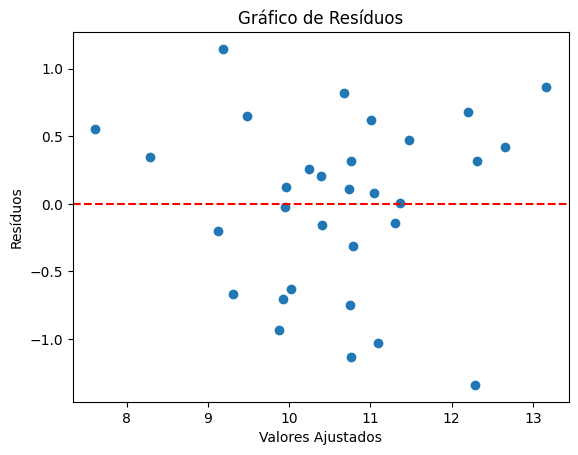

In [16]:
# Resíduos vs. Valores Ajustados
plt.scatter(modelo.fittedvalues, modelo.resid)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Valores Ajustados')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos')
plt.show()